In [1]:
import xgboost

In [3]:
from numpy import loadtxt
from xgboost import XGBClassifier # 引入xgoost
from sklearn.model_selection import train_test_split # 训练集 测试集划分
from sklearn.metrics import accuracy_score # 准确率

In [4]:
dataset = loadtxt('./xgboost/pima-indians-diabetes.csv',delimiter=",")

In [6]:
dataset[:5]

array([[  6.00000000e+00,   1.48000000e+02,   7.20000000e+01,
          3.50000000e+01,   0.00000000e+00,   3.36000000e+01,
          6.27000000e-01,   5.00000000e+01,   1.00000000e+00],
       [  1.00000000e+00,   8.50000000e+01,   6.60000000e+01,
          2.90000000e+01,   0.00000000e+00,   2.66000000e+01,
          3.51000000e-01,   3.10000000e+01,   0.00000000e+00],
       [  8.00000000e+00,   1.83000000e+02,   6.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   2.33000000e+01,
          6.72000000e-01,   3.20000000e+01,   1.00000000e+00],
       [  1.00000000e+00,   8.90000000e+01,   6.60000000e+01,
          2.30000000e+01,   9.40000000e+01,   2.81000000e+01,
          1.67000000e-01,   2.10000000e+01,   0.00000000e+00],
       [  0.00000000e+00,   1.37000000e+02,   4.00000000e+01,
          3.50000000e+01,   1.68000000e+02,   4.31000000e+01,
          2.28800000e+00,   3.30000000e+01,   1.00000000e+00]])

In [7]:
X = dataset[:,0:8] # 前8列为属性值
Y = dataset[:,8] # 最后一列 为标签

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" %(accuracy * 100.0))

Accuracy: 77.95%


In [9]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('./xgboost/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()

eval_set = [(X_test, y_test)]
# 10 如果连续10次模型的效果都没有提升，则停止
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.612239
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.51977
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


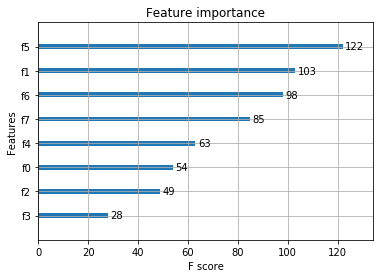

In [10]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
%matplotlib inline

dataset = loadtxt('./xgboost/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [12]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


dataset = loadtxt('./xgboost/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f  with: %r" % (mean, param))

Best: -0.483304 using {'learning_rate': 0.1}
-0.689811  with: {'learning_rate': 0.0001}
-0.661827  with: {'learning_rate': 0.001}
-0.531155  with: {'learning_rate': 0.01}
-0.483304  with: {'learning_rate': 0.1}
-0.515642  with: {'learning_rate': 0.2}
-0.554158  with: {'learning_rate': 0.3}
